<a href="https://colab.research.google.com/github/Raahulsi/Retail-sales/blob/main/Capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

**Problem Description**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

**Rossmann Stores Data.csv** - historical data including Sales

**store.csv** - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Alma better Capstone_project2/Rossmann Stores Data.csv'
rossmann_df = pd.read_csv(file_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
file_path1 = '/content/drive/MyDrive/Alma better Capstone_project2/store.csv'
store_df = pd.read_csv(file_path1)

In [5]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
rossmann_df.shape

(1017209, 9)

we can see here that the rossmann dataset consists of 1017209 values and 9 features

In [8]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [10]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
store_df.shape

(1115, 10)

The store dataset consists of 1115 values and 10 features



In [15]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values. we have to clean those data. Let's start checking.

**1. CompetitionDistance**

In [16]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Here replacing the null with Median.



In [17]:
# code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

**2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'**

There are not much information provided to these data. Also we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [18]:
#lets replace nan values with 0
#creating the copy of store_df 

store_new = store_df.copy()

# Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

#Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Lets Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv file Store column is common.**

In [19]:
final = pd.merge(rossmann_df,store_new, on ='Store',how = 'left')

In [20]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [21]:
final.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [22]:
final.shape

(1017209, 18)

In [23]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

**Changing the data type of some of the columns into int type**

In [24]:
# Changing the data type of StateHoliday from object type to int type
final.loc[final['StateHoliday'] == '0', 'StateHoliday'] = 0
final.loc[final['StateHoliday'] == 'a', 'StateHoliday'] = 1
final.loc[final['StateHoliday'] == 'b', 'StateHoliday'] = 2
final.loc[final['StateHoliday'] == 'c', 'StateHoliday'] = 3
final['StateHoliday'] = final['StateHoliday'].astype(int, copy=False)

print('levels :', final['StateHoliday'].unique(), '; data type :', final['StateHoliday'].dtype)


levels : [0 1 2 3] ; data type : int64


In [25]:
# Changing the Assortment dtype from object to int
final.loc[final['Assortment'] == 'a', 'Assortment'] = 0
final.loc[final['Assortment'] == 'b', 'Assortment'] = 1
final.loc[final['Assortment'] == 'c', 'Assortment'] = 2
final['Assortment'] = final['Assortment'].astype(int, copy=False)

print('levels :', final['Assortment'].unique(), '; data type :', final['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [29]:
# Changing StoreType dtype from object to int
final.loc[final['StoreType']=='a','StoreType']=0
final.loc[final['StoreType']=='b','StoreType'] = 1
final.loc[final['StoreType']=='c','StoreType']= 2
final.loc[final['StoreType'] == 'd', 'StoreType'] = 3
final['StoreType']= final['StoreType'].astype(int,copy = False)
print('levels :', final['StoreType'].unique(), '; data type :', final['StoreType'].dtype)




levels : [2 0 3 1] ; data type : int64


In [30]:
# changing format of date from object to datetime
final['Date'] = pd.to_datetime(final['Date'], format= '%Y-%m-%d')

In [31]:
final['CompetitionOpenSinceYear']= final['CompetitionOpenSinceYear'].astype(int)
final['Promo2SinceYear']= final['Promo2SinceYear'].astype(int)

In [32]:
final['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final['Date']).month

In [33]:
final['CompetitionDistance']= final['CompetitionDistance'].astype(int)
final['Promo2SinceWeek']= final['Promo2SinceWeek'].astype(int)

**Checking the dtypes of columns**

In [36]:
final.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

**Exploratory Data Analysis**

In [37]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [38]:
final.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900,1,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880,1,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260,1,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870,1,0,0,0,0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,3,2,5350,1,0,1,22,2012,"Mar,Jun,Sept,Dec"


In [40]:
final.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5422.02,5.85,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7706.92,3.33,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,710.00,3.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2325.00,6.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [41]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

**Sales**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

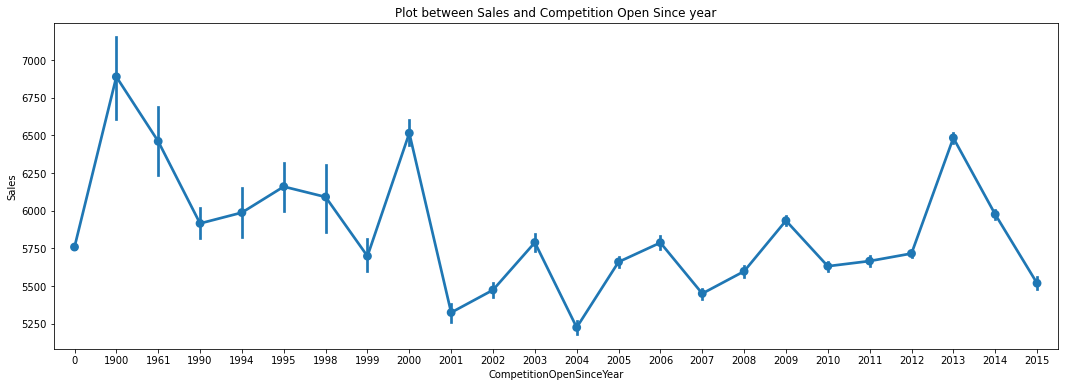

In [45]:
plt.figure(figsize=(18,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final)
plt.title('Plot between Sales and Competition Open Since year')



From this Plot we can see that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

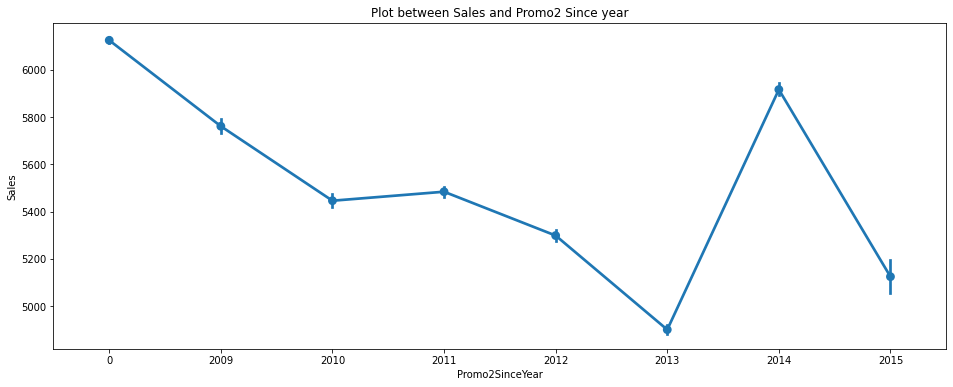

In [46]:
plt.figure(figsize=(16,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows the effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales was minimum and also in year 2012 and 2015 sales are very low.



Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

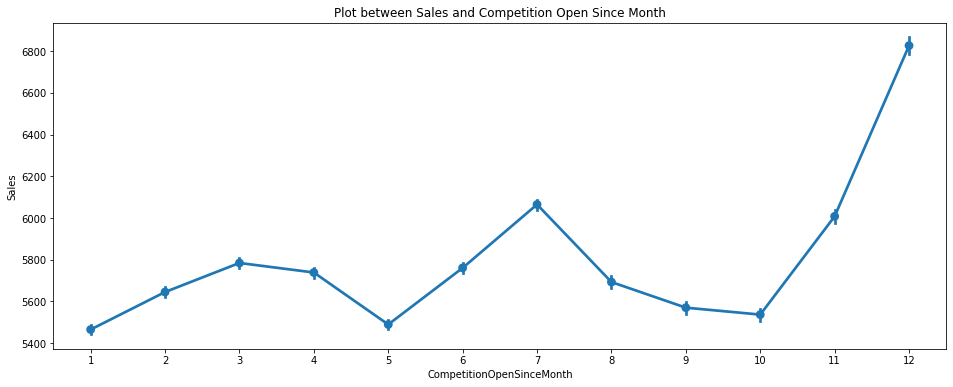

In [49]:
plt.figure(figsize=(16,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December month due to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

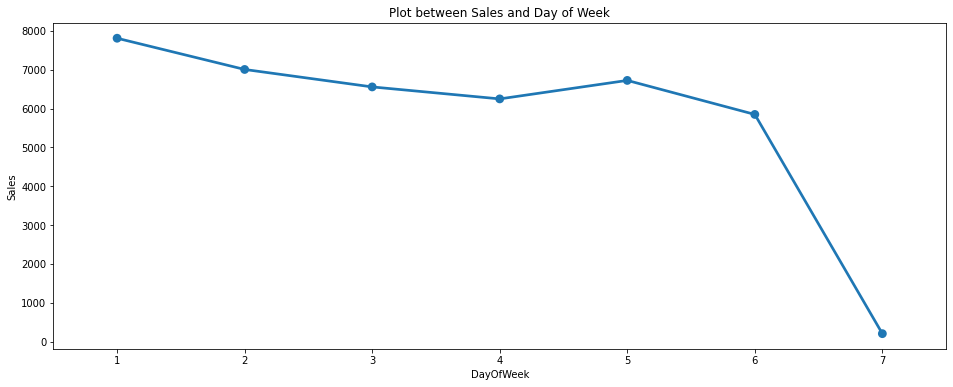

In [50]:
plt.figure(figsize=(16,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.



**BoxPlot of sales between Assortment and store type**

Text(0.5, 1.0, 'Boxplot For Sales Values')

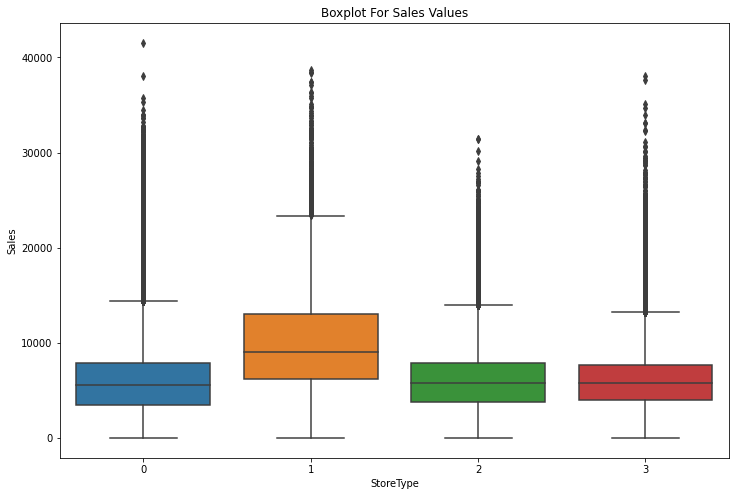

In [51]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

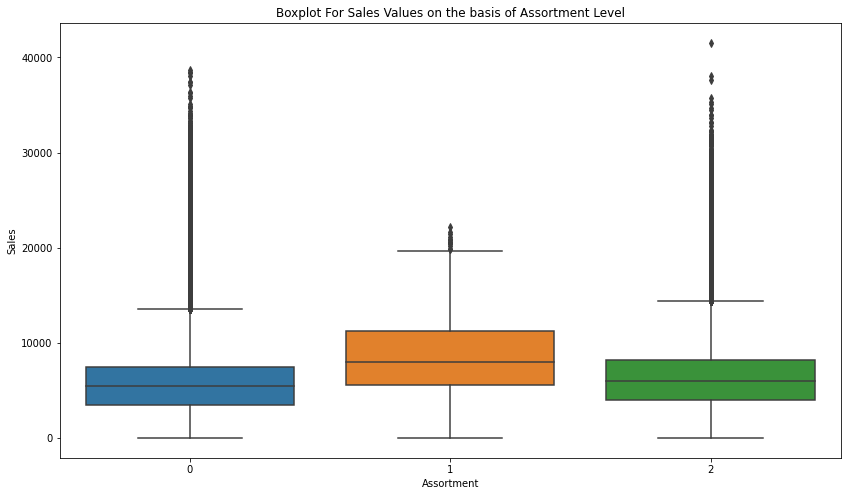

In [52]:
plt.figure(figsize=(14, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

**Plot between Dayof Week and Open & promo**.

Text(0.5, 1.0, 'Store Daily Open Countplot')

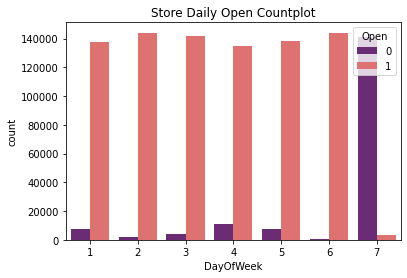

In [55]:
sns.countplot(x= 'DayOfWeek', hue='Open', data= final, palette='magma')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

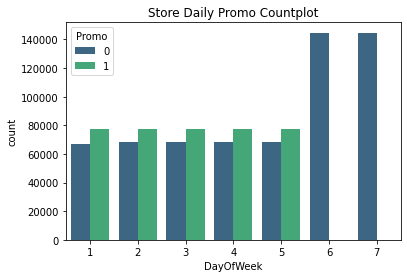

In [56]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final, palette='viridis')
plt.title('Store Daily Promo Countplot')

**Promo**

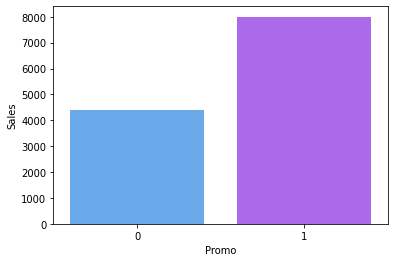

In [57]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=final, palette='cool')


Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which did not opt for promotion and 1 represents stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who did not took promotion.

**StateHoliday and SchoolHoliday**

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

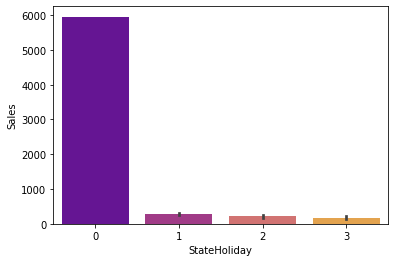

In [58]:
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final,palette='plasma')

As we can see from the bargraph during public holiday sales is maximum.

**Sales during school holiday**

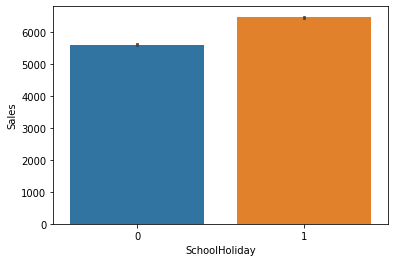

In [59]:
from seaborn.rcmod import palettes
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final)


We can observe that most of the stores remain closed during State and School Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

**Store Type**

In [60]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

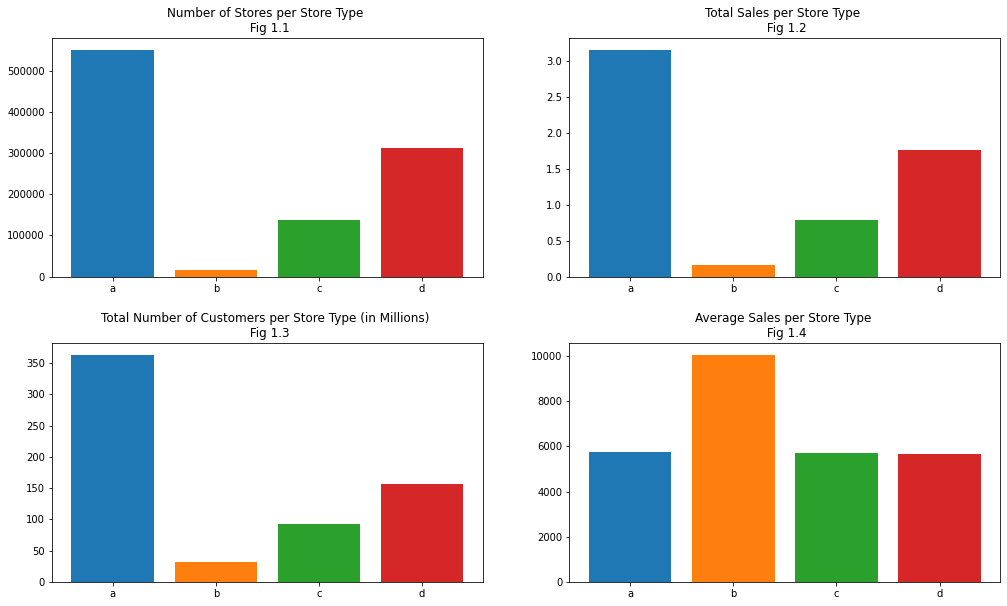

In [61]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.

**Assortments**

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

1.a means basic things

2.b means extra things

3.c means extended things so the highest variety of products.

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

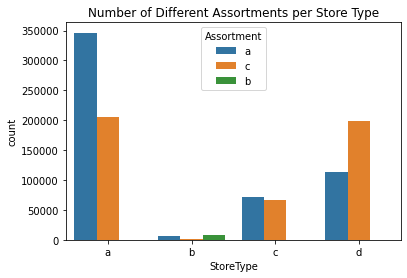

In [62]:
Storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

We can clearly see here that most of the stores have either a assortment type or c assortment type. Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.



**Conclusions from EDA**

1.There are two datasets - 1) Rossmann.csv & 2) Store.csv

2.shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115, 10)

3.In both dataset 'Store' column is common. So we do inner join on the basis of column 'Store'.

4.On looking on datasets we find lots of Nan values in Store dataset.

5.Try to replace Nan values with suitable values. In CompetitionDistance column only 3 Nan values are there. So we replaced it with median.

6.Now for rest columns(CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, romointerval) there are lots of Nan values and best way to treat this values to replace with 0.

7.After combining shape of final dataset = (1017209,18)

8.Also there is some columns such as 'StateHoliday', 'SchoolHoliday' & 'Assortment' which contains object values. So, try to change into int by giving suitable values.


we also did some graphs analysis and conclusions we got are:-

1.From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.

2.From plot Sales and day of week, Sales highest on Monday and start declinig from tuesday to saturday and on Sunday Sales almost near to Zero. This is because on Sunday all stores be closed.

3.Plot between promotion and Sales shows that promotion helps in increasing Sales. This similar trends also shows with customers.

4.Plot between StateHolidays and sales shows that during Public holiday sales are actually high but for other holidays such as Easter and Christmas sales be very low. This is because During Easter and Christmas stores also closed so sales goes down.
